In [ ]:
import datetime as dt
import math
import warnings
from math import exp, log, sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy import stats
from scipy.integrate import quad
from scipy.interpolate import splev, splrep
from scipy.optimize import brute, fmin
from numpy.random import rand, seed

## Step 3 - Data (Sep-Oct 2008)

In [ ]:
tickers_fi = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'MUFG', 'NMR']
tickers_nfi = ['R', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS','BA']
ticks = tickers_fi + tickers_nfi

start_date = '2008-09-01'
end_date = '2008-10-31'

In [ ]:
df_data = yf.download(tickers = ticks, start = start_date, end = end_date)['Adj Close']
df_price = df_data.to_numpy() # to use from step 6 onwards
df_dates = pd.to_datetime(df_data.index, format = '%Y-%m-%d')
df_data.head()

[*********************100%%**********************]  30 of 30 completed


Ticker,APA,AXP,BA,BAC,C,CMS,COF,CSCO,DAL,DUK,...,PFE,PNC,PRU,R,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,83.196655,31.573765,49.039165,25.151960,146.249741,8.078381,34.487888,16.106047,8.070848,25.600845,...,9.906129,48.128845,43.563801,41.949875,20.580000,19.826714,20.702477,20.726856,14.145217,43.723145
2008-09-03,84.088531,31.791357,49.188057,25.914606,150.076309,7.983411,35.056030,15.807650,8.018040,25.276033,...,9.921630,48.574509,44.722660,41.982159,21.799999,19.851313,21.073420,20.594032,14.178416,44.118973
2008-09-04,86.083588,30.112808,46.924831,24.059069,140.050735,7.995282,33.267143,15.109171,7.886019,25.527027,...,9.647756,47.676647,43.293793,41.000420,20.379999,19.318327,20.241999,19.704130,14.176048,43.055870
2008-09-05,87.178856,30.617935,46.820602,25.340649,145.943634,7.918113,34.326660,15.095610,7.754001,25.556551,...,9.565074,48.685894,44.295116,40.432045,19.070000,19.752913,20.939112,20.720224,14.403692,42.761837
2008-09-08,85.880135,31.488300,47.579967,27.306250,155.509949,8.161479,37.413067,15.848351,7.560372,26.383335,...,9.890627,50.317719,47.771679,41.439632,18.900000,20.679466,21.706581,22.287521,14.702498,43.412148


## Step 4 - Correlation Matrix

In [ ]:
df_returns = df_data.pct_change().dropna(axis='rows')
df_returns.head()

Ticker,APA,AXP,BA,BAC,C,CMS,COF,CSCO,DAL,DUK,...,PFE,PNC,PRU,R,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03,0.010720,0.006892,0.003036,0.030322,0.026165,-0.011756,0.016474,-0.018527,-0.006543,-0.012688,...,0.001565,0.009260,0.026601,0.000770,0.059281,0.001241,0.017918,-0.006408,0.002347,0.009053
2008-09-04,0.023726,-0.052799,-0.046012,-0.071602,-0.066803,0.001487,-0.051029,-0.044186,-0.016465,0.009930,...,-0.027604,-0.018484,-0.031950,-0.023385,-0.065138,-0.026849,-0.039454,-0.043212,-0.000167,-0.024096
2008-09-05,0.012723,0.016774,-0.002221,0.053268,0.042077,-0.009652,0.031849,-0.000898,-0.016741,0.001157,...,-0.008570,0.021169,0.023129,-0.013863,-0.064279,0.022496,0.034439,0.051568,0.016058,-0.006829
2008-09-08,-0.014897,0.028427,0.016219,0.077567,0.065548,0.030735,0.089913,0.049865,-0.024971,0.032351,...,0.034036,0.033517,0.078486,0.024921,-0.008915,0.046907,0.036652,0.075641,0.020745,0.015208
2008-09-09,-0.083993,-0.056269,0.001721,-0.063633,-0.070866,-0.024000,-0.066284,-0.017116,-0.041909,0.012871,...,-0.047022,-0.051186,-0.060292,-0.025094,-0.020106,-0.068596,-0.055392,-0.071216,-0.014032,-0.045721


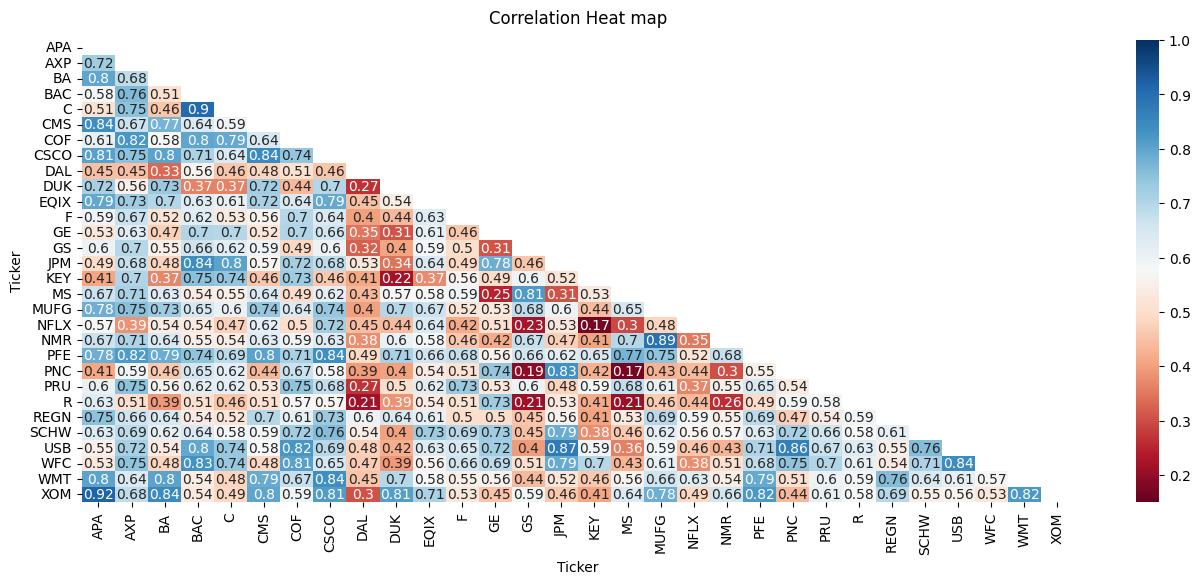

In [ ]:
corrs = df_returns.corr()
corr_min = (corrs.min()).min() * 0.9
corr_max = 1

plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(corrs))
heatmap = sns.heatmap(corrs, mask = mask, vmin=corr_min, vmax=corr_max, cmap='RdBu', annot = True)
heatmap.set_title('Correlation Heat map', fontdict={'fontsize':12}, pad=12);

<Figure size 1600x600 with 0 Axes>

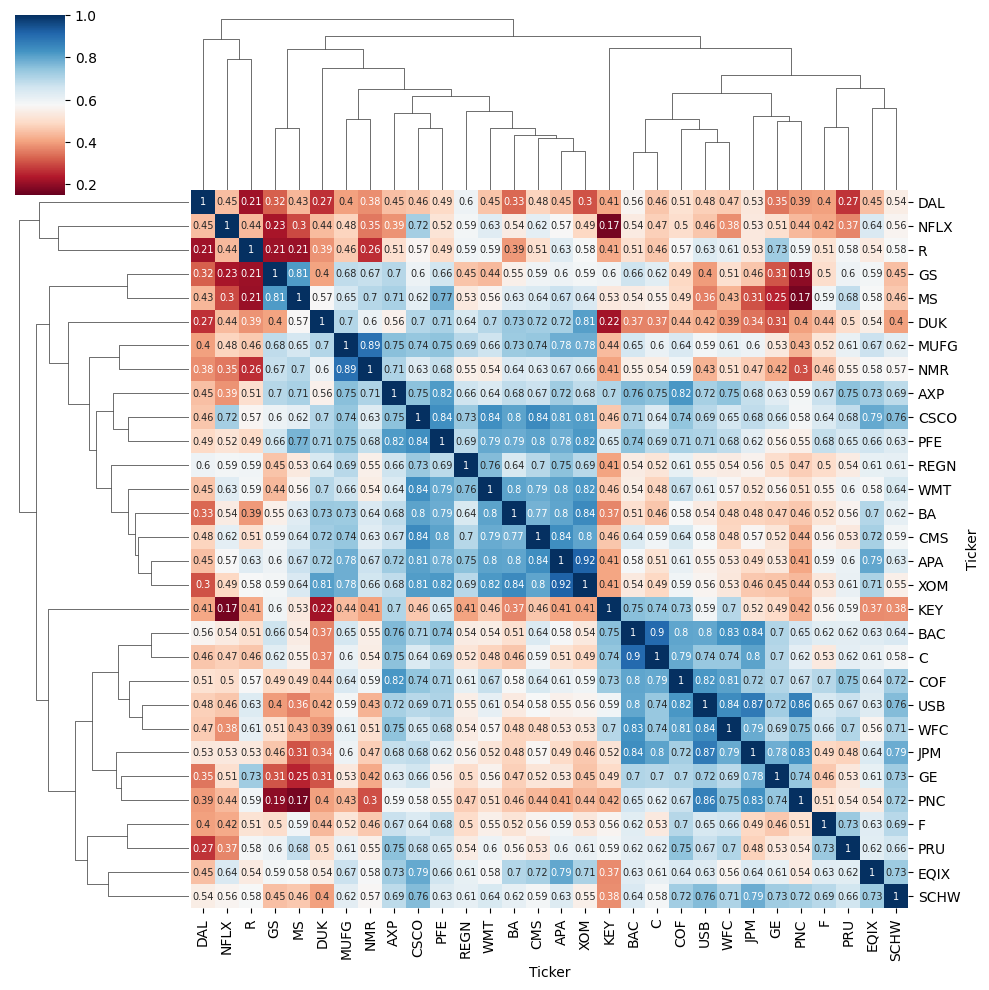

In [ ]:
# Sorting using sns.clustermap:

plt.figure(figsize = (16,6))
heatmap = sns.clustermap(corrs, row_cluster = True, vmin=corr_min, vmax=corr_max, cmap='RdBu', annot = True,annot_kws={"size": 7});

## Step 6 - UCB (Sep-Oct 2008)

In [ ]:
def optimal_action(qvalue, eps):
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:
                break
    elif action_hat[0].shape[0] > 1:
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):
            if randnum < (aa + 1) / action_hat[0].shape[0]:
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new


def gwp3_sm(datedf,df,ucb,epsilon,alfa,neps,hold):
    NK = df.shape[1]
    TMAX = df.shape[0] - hold

    seed(5658)

    reward_avg = np.zeros((TMAX))
    optimal_avg = np.zeros((TMAX))
    reward_queue = np.zeros((hold, 2))

    for run in range(neps):
        # Initialize q function and actions record
        qvalue = np.zeros((NK))
        qvalue_up = np.zeros((NK))
        nactions = np.zeros((NK))
        for tt in range(TMAX):
            aa_opt = optimal_action(qvalue_up, epsilon)
            nactions[aa_opt] += 1
            # Compute reward as return over holding period
            reward_queue[hold - 1, 0] = (
                df[tt + hold, aa_opt] - df[tt, aa_opt]
            ) / df[tt, aa_opt]
            reward_queue[hold - 1, 1] = aa_opt
            # Update Q function using action chosen hold days before
            qvalue = reward_update(
                int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, alfa
            )

            #qvalue = reward_update(
            #    int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, 1/naction[aa_opt]))
            #print(qvalue)                  #uncomment if need to avg across all episodes

            # Upper-confidence adjustment
            qvalue_up = np.zeros((NK))
            for aa in range(NK):
                if nactions[aa] == 0:
                    qvalue_up[aa] = np.max(qvalue) + 1.0
                else:
                    qvalue_up[aa] = qvalue[aa] + ucb * np.sqrt(np.log(tt + 1) / nactions[aa])
            reward_queue[0 : hold - 1, :] = reward_queue[1:hold, :]
            reward_avg[tt] += reward_queue[hold - 1, 0] / neps
            optimal_avg[tt] += (
                aa_opt == np.argmax((df[tt + hold, :] - df[tt, :]) / df[tt, :])
            ) / neps

    returns_max = np.max((df[hold:df.shape[0],:]-df[0:TMAX,:])/df[0:TMAX,:],axis=1)
    returns_mean = np.mean((df[hold:df.shape[0],:]-df[0:TMAX,:])/df[0:TMAX,:],axis = 1)
    dates = datedf[hold : df.shape[0]]

    return_cumulative = np.zeros((TMAX+1,2))
    return_cumulative[0,0] = 1
    return_cumulative[0,1] = 1

    for tt in range(1,TMAX+1):
      return_cumulative[tt,0] = return_cumulative[tt-1,0] * (1+reward_avg[tt-1])
      rmean = np.mean((df[tt+HOLD-1,:]-df[tt-1,:])/df[tt-1,:])
      return_cumulative[tt,1] = return_cumulative[tt-1,1] * (1 + rmean)

    return_cum_bandit = return_cumulative[:,0]
    return_cum_avg = return_cumulative[:,1]

    return dates, optimal_avg, reward_avg, returns_max, returns_mean, return_cum_bandit, return_cum_avg

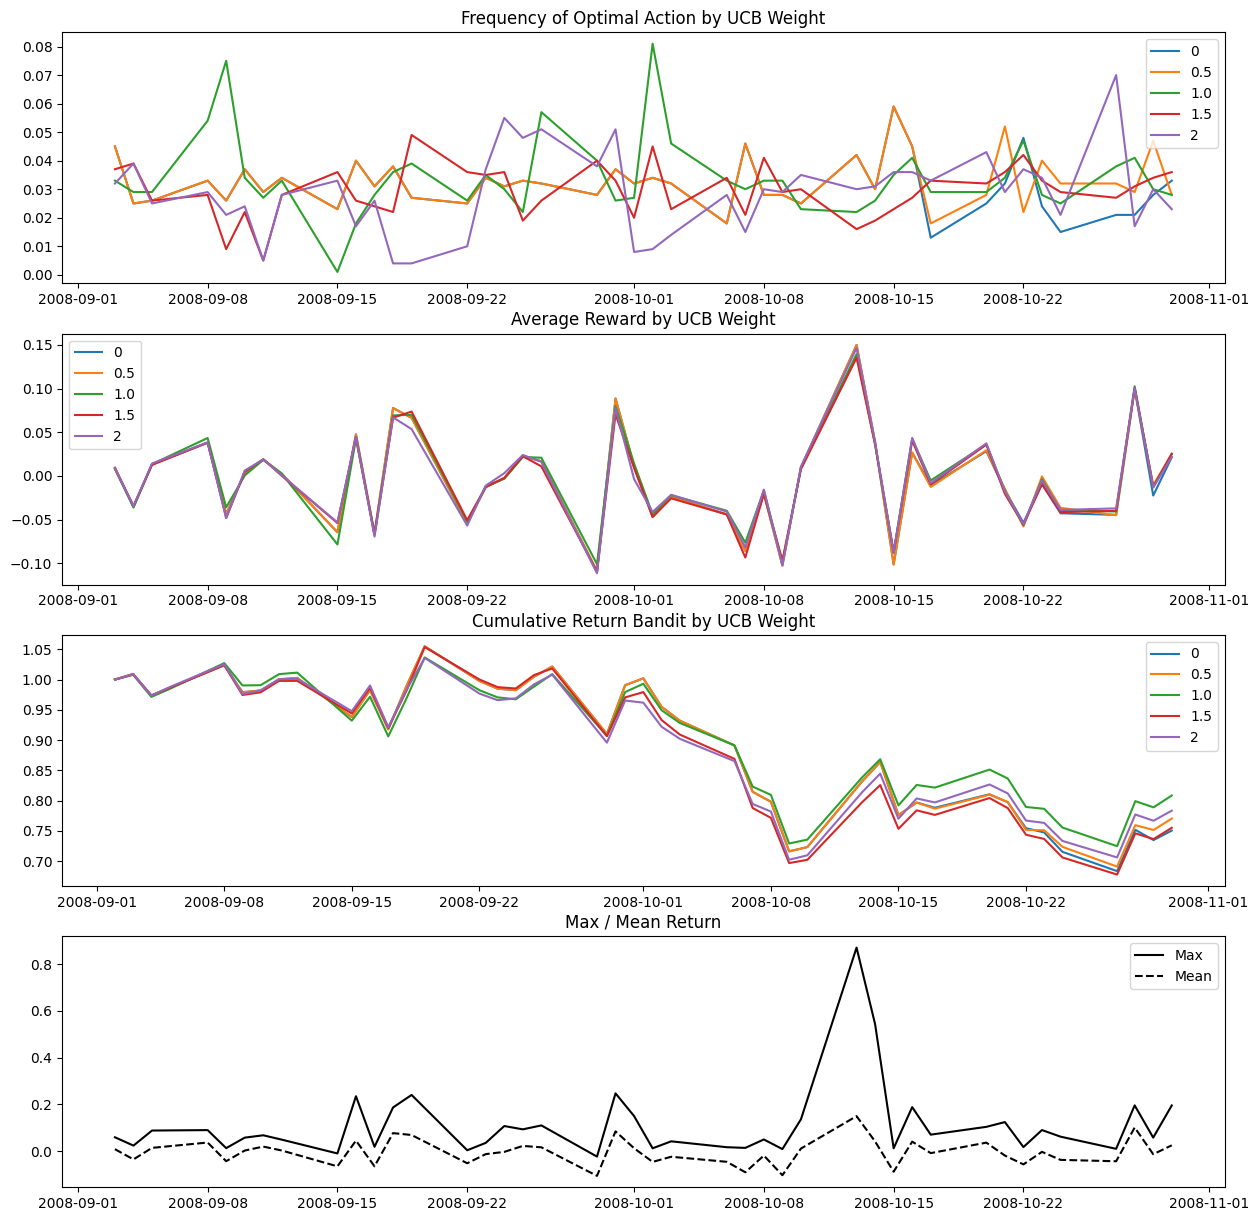

In [ ]:
EPSILON = 0.0
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
UCB_WEIGHT = [0, 0.5, 1.0, 1.5, 2]
seed(5658)

fig, axs = plt.subplots(4,1, figsize=(15,15))
axs[0].set_title('Frequency of Optimal Action by UCB Weight')
axs[1].set_title('Average Reward by UCB Weight')
axs[2].set_title('Cumulative Return Bandit by UCB Weight')
axs[3].set_title('Max / Mean Return')


for U in UCB_WEIGHT:
  dates, optimal_avg, reward_avg, returns_max, returns_mean, return_cum_bandit, return_cum_avg  = gwp3_sm(df_dates,df_price, U ,EPSILON,ALPHA,NEPISODES,HOLD)

  axs[0].plot(dates,optimal_avg, label = U)
  axs[0].legend()
  axs[1].plot(dates,reward_avg, label = U)
  axs[1].legend()
  axs[2].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit, label = U)
  axs[2].legend()

axs[3].plot(dates,returns_max, 'k',label = "Max")
axs[3].plot(dates,returns_mean, '--k',label = "Mean")
axs[3].legend()



Observation: Given we have 30 stocks - we pick best stock with probability 1/30 = 0.033 which is reflected in the graph above

## Step 8 - Epsilon Greedy (Sep-Oct 2008)

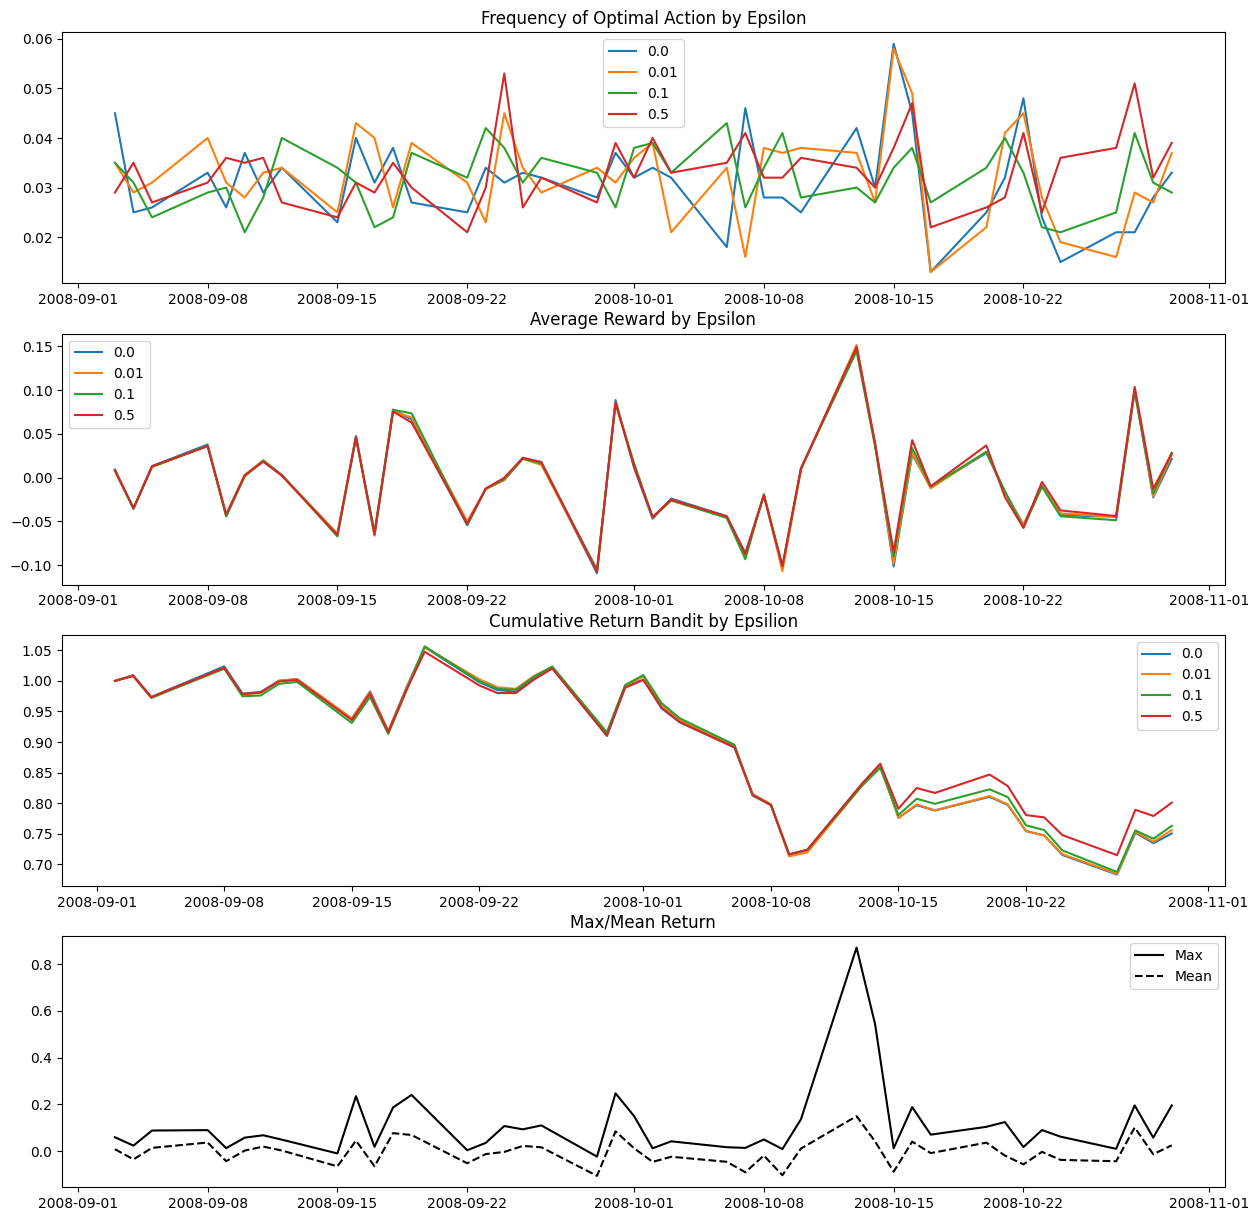

In [ ]:
EPSILON = [0.0, 0.01, 0.1, 0.5]
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
UCB_WEIGHT = 0
seed(5658)

fig, axs = plt.subplots(4,1, figsize=(15,15))
axs[0].set_title('Frequency of Optimal Action by Epsilon')
axs[1].set_title('Average Reward by Epsilon')
axs[2].set_title('Cumulative Return Bandit by Epsilion')
axs[3].set_title('Max/Mean Return')


for E in EPSILON:
  dates, optimal_avg, reward_avg, returns_max, returns_mean, return_cum_bandit, return_cum_avg  = gwp3_sm(df_dates,df_price, UCB_WEIGHT , E,ALPHA,NEPISODES,HOLD)

  axs[0].plot(dates,optimal_avg, label = E)
  axs[0].legend()
  axs[1].plot(dates,reward_avg, label = E)
  axs[1].legend()
  axs[2].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit, label = E)
  axs[2].legend()

axs[3].plot(dates,returns_max, 'k',label = "Max")
axs[3].plot(dates,returns_mean, '--k',label = "Mean")
axs[3].legend()

## Step 9 - Comparison

In [ ]:
EPSILON = 0.5
U = 1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1

seed(5658)

dates_u, optimal_avg_u, reward_avg_u, returns_max_u, returns_mean_u, return_cum_bandit_u, return_cum_avg_u  = gwp3_sm(df_dates,df_price, U , 0,ALPHA,NEPISODES,HOLD)

dates_e, optimal_avg_e, reward_avg_e, returns_max_e, returns_mean_e, return_cum_bandit_e, return_cum_avg_e  = gwp3_sm(df_dates,df_price, 0 ,EPSILON,ALPHA,NEPISODES,HOLD)


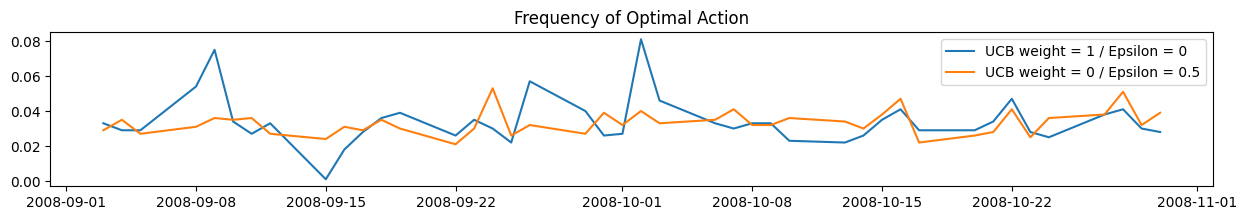

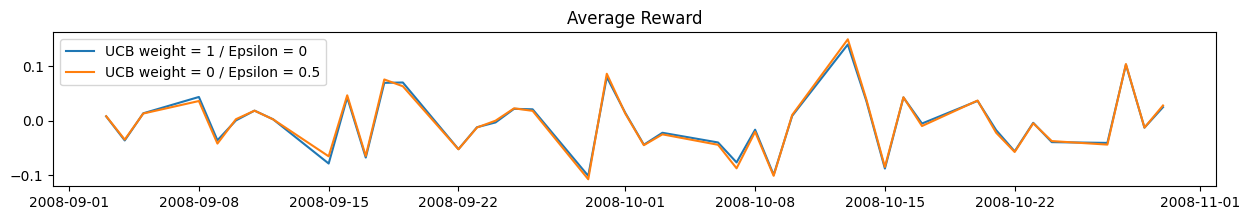

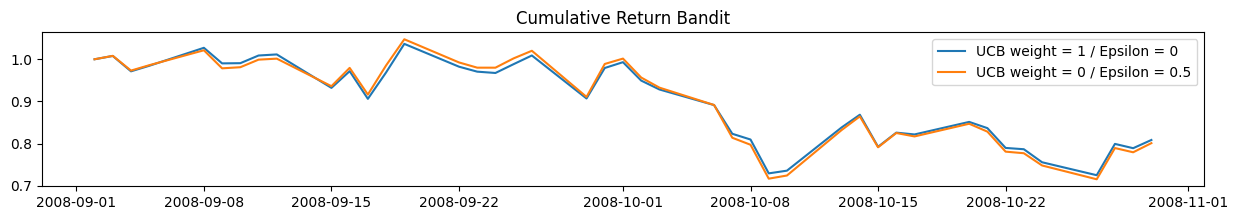

In [ ]:
plt.figure(figsize = (15,2))
plt.title('Frequency of Optimal Action')
plt.plot(dates_u,optimal_avg_u, label = "UCB weight = 1 / Epsilon = 0")
plt.plot(dates_e,optimal_avg_e, label = "UCB weight = 0 / Epsilon = 0.5")
plt.legend()

plt.figure(figsize = (15,2))
plt.title('Average Reward')
plt.plot(dates_u, reward_avg_u, label = "UCB weight = 1 / Epsilon = 0")
plt.plot(dates_e, reward_avg_e, label = "UCB weight = 0 / Epsilon = 0.5")
plt.legend()

plt.figure(figsize = (15,2))
plt.title('Cumulative Return Bandit')
plt.plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit_u, label = "UCB weight = 1 / Epsilon = 0")
plt.plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit_e, label = "UCB weight = 0 / Epsilon = 0.5")
plt.legend()

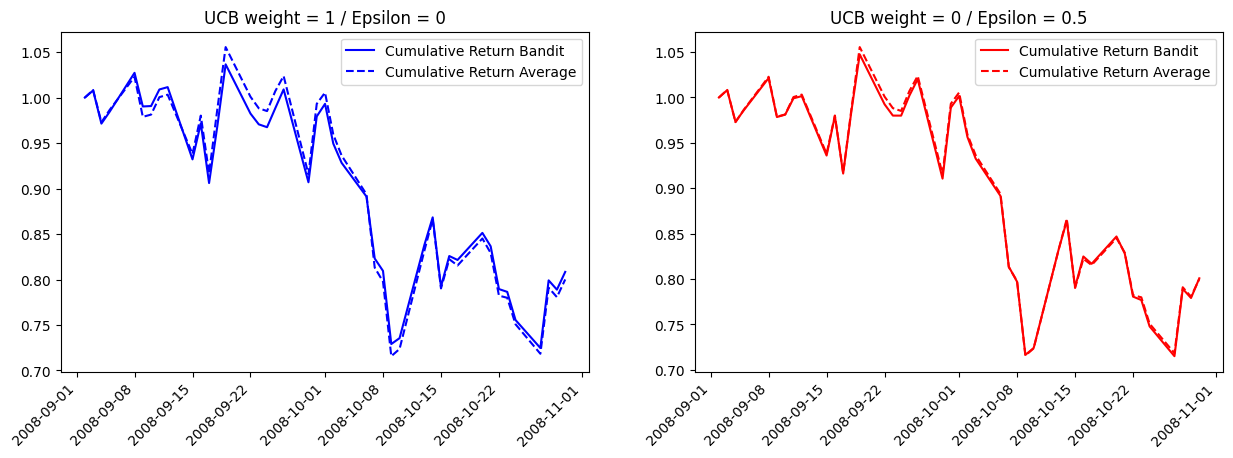

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.autofmt_xdate(rotation=45)
axs[0].set_title('UCB weight = 1 / Epsilon = 0')
axs[1].set_title('UCB weight = 0 / Epsilon = 0.5')

axs[0].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit_u, 'b', label = "Cumulative Return Bandit")
axs[0].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_avg_u, '--b', label = "Cumulative Return Average")
axs[0].legend()

axs[1].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit_e, 'r', label = "Cumulative Return Bandit")
axs[1].plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_avg_e, '--r', label = "Cumulative Return Average")
axs[1].legend()

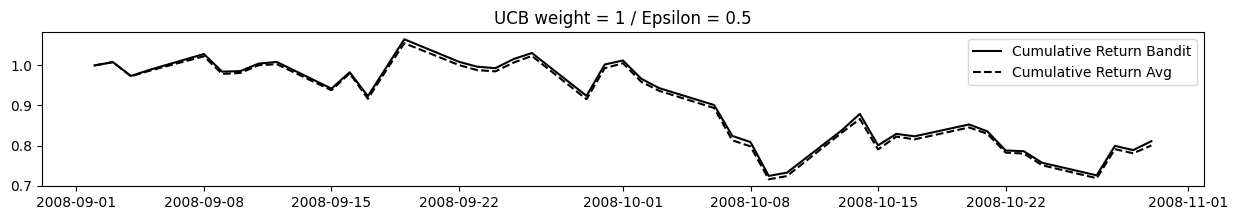

In [ ]:
EPSILON = 0.5
U = 1
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1

seed(5658)

dates_u, optimal_avg_u, reward_avg_u, returns_max_u, returns_mean_u, return_cum_bandit_u, return_cum_avg_u  = gwp3_sm(df_dates,df_price, U , EPSILON,ALPHA,NEPISODES,HOLD)

plt.figure(figsize = (15,2))
plt.title('UCB weight = 1 / Epsilon = 0.5')
plt.plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_bandit_u, 'k', label = "Cumulative Return Bandit")
plt.plot(df_dates[HOLD-1:df_price.shape[0]],return_cum_avg_u, '--k', label = "Cumulative Return Avg")
plt.legend()


## Step 10 - Data (Mar-Apr 2024)

In [ ]:
start_date2 = '2024-03-01'
end_date2 = '2024-04-30'

df2_data = yf.download(tickers = ticks, start = start_date2, end = end_date2)['Adj Close']
df2_price = df2_data.to_numpy() # to use from step 6 onwards
df2_dates = pd.to_datetime(df2_data.index, format = '%Y-%m-%d')
df2_data.head()

[*********************100%%**********************]  30 of 30 completed


Ticker,APA,AXP,BA,BAC,C,CMS,COF,CSCO,DAL,DUK,...,PFE,PNC,PRU,R,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-01,30.175571,218.981537,200.000000,34.349998,55.121155,58.139999,136.194092,48.007782,42.079849,90.860001,...,26.590000,146.323074,108.010002,113.559998,982.820007,66.470001,40.953751,55.060001,58.560551,105.839996
2024-03-04,29.798502,218.233856,200.539993,35.150002,55.656506,58.970001,135.417374,48.731865,41.490971,92.419998,...,25.889999,152.193420,107.089996,113.129997,971.190002,67.639999,42.219345,55.810001,59.098721,104.360001
2024-03-05,30.225185,216.529129,201.139999,35.389999,55.775471,59.299999,136.980759,48.553322,41.720531,92.690002,...,26.080000,153.559540,108.930000,112.510002,965.210022,68.099998,42.763153,56.599998,59.836212,105.639999
2024-03-06,30.393875,217.775269,201.000000,35.419998,56.796604,60.299999,135.168427,48.771538,41.940113,94.070000,...,27.190001,148.867218,109.610001,113.830002,972.099976,68.099998,42.604954,57.110001,60.364410,106.769997
2024-03-07,30.314491,222.729919,203.029999,35.630001,57.222900,60.080002,137.070374,48.503731,42.698669,94.480003,...,26.790001,148.926620,110.720001,116.029999,973.309998,68.190002,42.852139,57.000000,60.155125,107.370003


In [ ]:
df2_returns = df2_data.pct_change().dropna(axis='rows')
df2_returns.head()

Ticker,APA,AXP,BA,BAC,C,CMS,COF,CSCO,DAL,DUK,...,PFE,PNC,PRU,R,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-04,-0.012496,-0.003414,0.002700,0.023290,0.009712,0.014276,-0.005703,0.015083,-0.013994,0.017169,...,-0.026326,0.040119,-0.008518,-0.003787,-0.011833,0.017602,0.030903,0.013622,0.009190,-0.013983
2024-03-05,0.014319,-0.007811,0.002992,0.006828,0.002137,0.005596,0.011545,-0.003664,0.005533,0.002921,...,0.007339,0.008976,0.017182,-0.005480,-0.006157,0.006801,0.012881,0.014155,0.012479,0.012265
2024-03-06,0.005581,0.005755,-0.000696,0.000848,0.018308,0.016863,-0.013231,0.004494,0.005263,0.014888,...,0.042561,-0.030557,0.006243,0.011732,0.007138,0.000000,-0.003699,0.009011,0.008827,0.010697
2024-03-07,-0.002612,0.022751,0.010099,0.005929,0.007506,-0.003648,0.014071,-0.005491,0.018087,0.004358,...,-0.014711,0.000399,0.010127,0.019327,0.001245,0.001322,0.005802,-0.001926,-0.003467,0.005620
2024-03-08,0.008511,-0.000224,-0.022361,-0.000842,-0.003638,0.002996,-0.003051,0.012270,-0.012623,0.004869,...,0.016051,-0.000731,0.003432,-0.010687,-0.004603,-0.014958,-0.001846,0.001228,-0.003976,0.009407


## Step 11 - UCB: weights = 0, 0.5, 1 (Mar-Apr 2024)

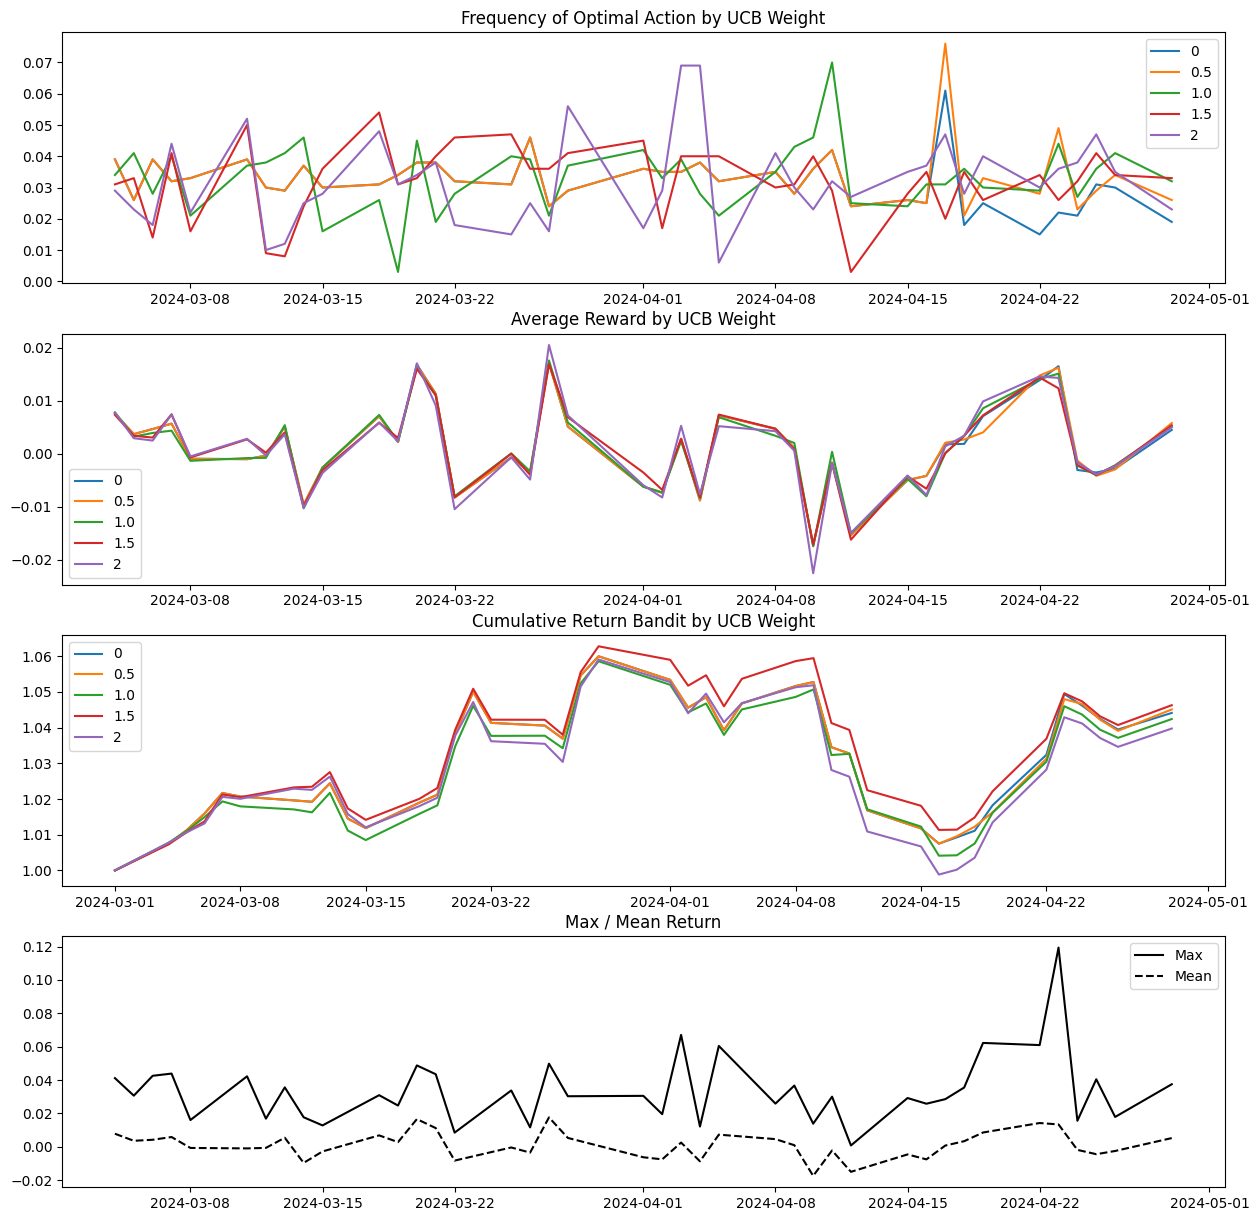

In [ ]:
EPSILON = 0.0
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
UCB_WEIGHT = [0, 0.5, 1.0, 1.5, 2]
seed(5658)

fig, axs = plt.subplots(4,1, figsize=(15,15))
axs[0].set_title('Frequency of Optimal Action by UCB Weight')
axs[1].set_title('Average Reward by UCB Weight')
axs[2].set_title('Cumulative Return Bandit by UCB Weight')
axs[3].set_title('Max / Mean Return')


for U in UCB_WEIGHT:
  dates, optimal_avg, reward_avg, returns_max, returns_mean, return_cum_bandit, return_cum_avg  = gwp3_sm(df2_dates,df2_price, U ,EPSILON,ALPHA,NEPISODES,HOLD)

  axs[0].plot(dates,optimal_avg, label = U)
  axs[0].legend()
  axs[1].plot(dates,reward_avg, label = U)
  axs[1].legend()
  axs[2].plot(df2_dates[HOLD-1:df2_price.shape[0]],return_cum_bandit, label = U)
  axs[2].legend()

axs[3].plot(dates,returns_max, 'k',label = "Max")
axs[3].plot(dates,returns_mean, '--k',label = "Mean")
axs[3].legend()

## Step 11 - Epsilon-greedy (Mar-Apr 2024)

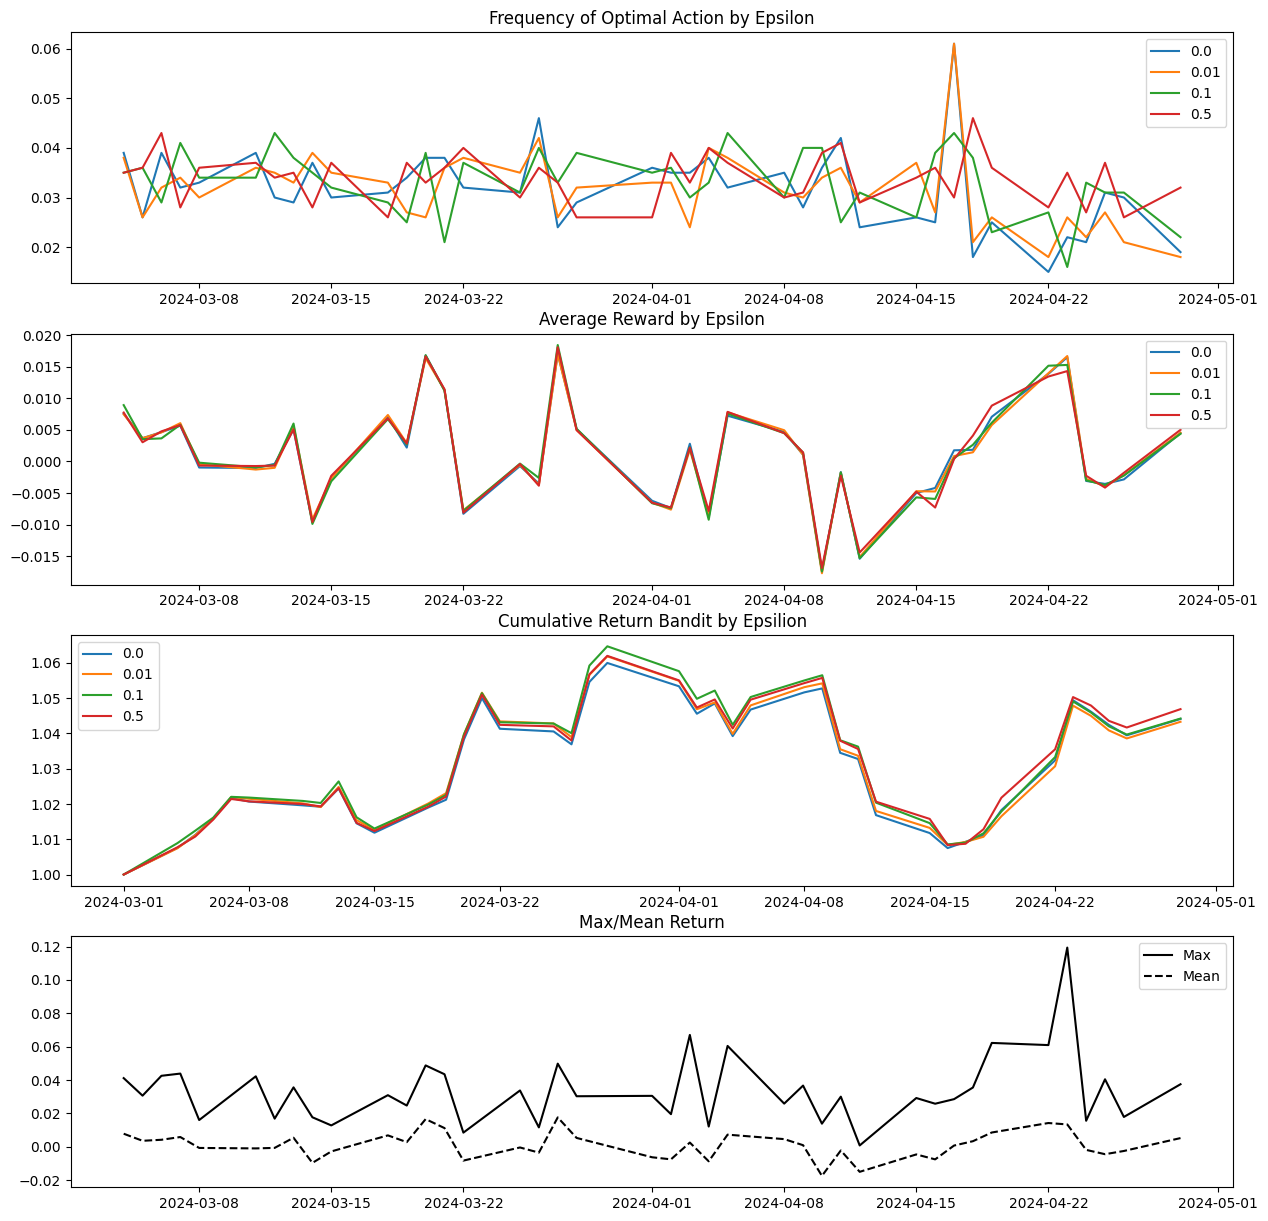

In [ ]:
EPSILON = [0.0, 0.01, 0.1, 0.5]
ALPHA = 0.85
NEPISODES = 1000
HOLD = 1
UCB_WEIGHT = 0
seed(5658)

fig, axs = plt.subplots(4,1, figsize=(15,15))
axs[0].set_title('Frequency of Optimal Action by Epsilon')
axs[1].set_title('Average Reward by Epsilon')
axs[2].set_title('Cumulative Return Bandit by Epsilion')
axs[3].set_title('Max/Mean Return')

for E in EPSILON:
  dates, optimal_avg, reward_avg, returns_max, returns_mean, return_cum_bandit, return_cum_avg  = gwp3_sm(df2_dates,df2_price, UCB_WEIGHT , E,ALPHA,NEPISODES,HOLD)

  axs[0].plot(dates,optimal_avg, label = E)
  axs[0].legend()
  axs[1].plot(dates,reward_avg, label = E)
  axs[1].legend()
  axs[2].plot(df2_dates[HOLD-1:df2_price.shape[0]],return_cum_bandit, label = E)
  axs[2].legend()

axs[3].plot(dates,returns_max, 'k',label = "Max")
axs[3].plot(dates,returns_mean, '--k',label = "Mean")
axs[3].legend()

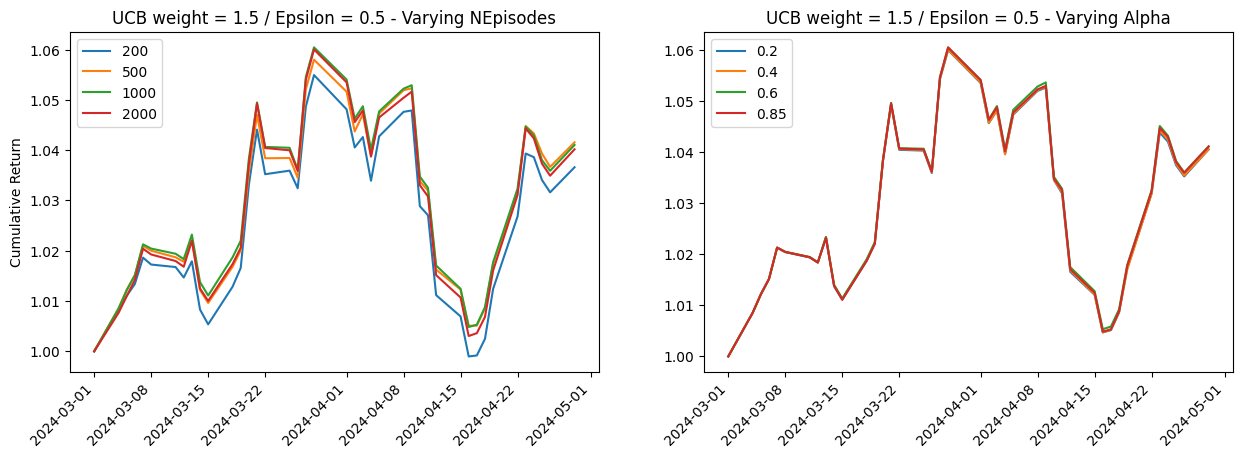

In [ ]:
EPSILON = 0.5
U = 1.5
ALPHA = [0.2, 0.4, 0.6, 0.85]
NEPISODES = [200,500,1000,2000]
HOLD = 1

seed(5658)

fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.autofmt_xdate(rotation=45)
axs[0].set_ylabel('Cumulative Return')
axs[0].set_title('UCB weight = 1.5 / Epsilon = 0.5 - Varying NEpisodes')
axs[1].set_title('UCB weight = 1.5 / Epsilon = 0.5 - Varying Alpha')

for n in NEPISODES:
    dates_u, optimal_avg_u, reward_avg_u, returns_max_u, returns_mean_u, return_cum_bandit_u, return_cum_avg_u  = gwp3_sm(df2_dates,df2_price, U , EPSILON, 0.85, n,HOLD)

    axs[0].plot(df2_dates[HOLD-1:df2_price.shape[0]],return_cum_bandit_u, label = n)
    axs[0].legend()

for a in ALPHA:
    dates_u, optimal_avg_u, reward_avg_u, returns_max_u, returns_mean_u, return_cum_bandit_u, return_cum_avg_u  = gwp3_sm(df2_dates,df2_price, U , EPSILON, a, 1000,HOLD)

    axs[1].plot(df2_dates[HOLD-1:df2_price.shape[0]],return_cum_bandit_u, label = a)
    axs[1].legend()